---

# Georgios_Ioannou


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center"> Text Emotion System Sentiment Analysis </h1>
<h2 align="center"> TESSA </h2>

In this notebook, we will be classifying emotion based on text documents. The dataset we will be using is called:

<p style="text-align: center;"><a href="https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp">Emotions Dataset for NLP</a></p>


---

<h2 align="center"> Remember our main steps motto "ISBE" </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model </h3>

1. **I** - `Inspect and explore data`
2. **S** - `Select and engineer features`
3. **B** - `Build and train model`
4. **E** - `Evaluate model`


---

<h2 align='center'> GPU Information </h2>


In [1]:
!nvidia-smi


Wed Dec 20 08:15:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

<h2 align='center'> Libraries </h2>


In [2]:
# Import libraries.

# Use inline so our visualizations display in notebook.


%matplotlib inline


import matplotlib.pyplot as plt   # Data visualization.
import nltk                       # Natural Language Processing.
import numpy as np                # Data wrangling.
import os                         # Manipulate operating system interfaces.
import pandas as pd               # Data handling.
pd.set_option('display.max_colwidth', None)
import pickle                     # Python object serialization.
import plotly.express as px       # Data visualization
import plotly.graph_objects as go # Data visualization
import re                         # Regular expression operations.
import seaborn as sns             # Data visualization.
import subprocess                 # To download nltk wordnet in Kaggle.
sns.set()
import warnings                   # Ignore all warnings.
warnings.filterwarnings('ignore')


from nltk.stem import WordNetLemmatizer # Lemmatize using WordNet's built-in morphy function.
from nltk.stem import PorterStemmer     # Remove morphological affixes from words, leaving only the word stem.
from nltk.corpus import stopwords       # Remove stopwaords.
from nltk import word_tokenize          # Tokenize.
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, multilabel_confusion_matrix, precision_score, recall_score # Evaluation metrics.
from sklearn.model_selection import train_test_split     # Eplit data in training/validating/testing.
from sklearn.naive_bayes import MultinomialNB            # Multinomial Naive Bayes classifier.
from sklearn.preprocessing import LabelEncoder           # Encode target labels with value between 0 and n_classes-1.
from tensorflow.keras.callbacks import EarlyStopping     # Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau # Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.layers import Activation, BatchNormalization, Bidirectional, Concatenate, Conv1D, Dense, Dropout, Embedding, GlobalMaxPooling1D, LSTM, MaxPooling1D, ReLU # Keras layers API.
from tensorflow.keras.models import Model, Sequential # Model achitecture.
from tensorflow.keras.optimizers import Adam         # Adam optimizer.
from tensorflow.keras.preprocessing.sequence import pad_sequences # Transformsa list of sequences into a 2D Numpy array.
from tensorflow.keras.preprocessing.text import Tokenizer         # Vectorize a text corpus.
from tensorflow.keras.utils import plot_model                     # Visualize the model and save it.
from tensorflow.keras.utils import to_categorical                 # Converts a class vector (integers) to binary class matrix.


try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = 'unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora'
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    

from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

True

---

## #3 Build And Train CNN + LSTM Model


In [58]:
# CNN + LSTM Model Hyperparameters.

# Embedding.

input_dim = vocabulary_size
output_dim = 200

# Convolution.

kernel_size = 5
filters = 128
pool_size = 4

# LSTM.

lstm_output_size = 128

In [59]:
# Create the neural network.

model = Sequential()

# X_train.shape[1] = 256
model.add(Embedding(input_dim, output_dim, input_length=X_train.shape[1]))

model.add(Dropout(0.25))

model.add(Conv1D(filters, kernel_size, padding="valid", activation="relu", strides=1))

model.add(MaxPooling1D(pool_size=pool_size))

model.add(LSTM(lstm_output_size))

model.add(Dense(6))

model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 200)          2865200   
                                                                 
 dropout_1 (Dropout)         (None, 256, 200)          0         
                                                                 
 conv1d (Conv1D)             (None, 252, 128)          128128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 63, 128)           0         
 D)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                      

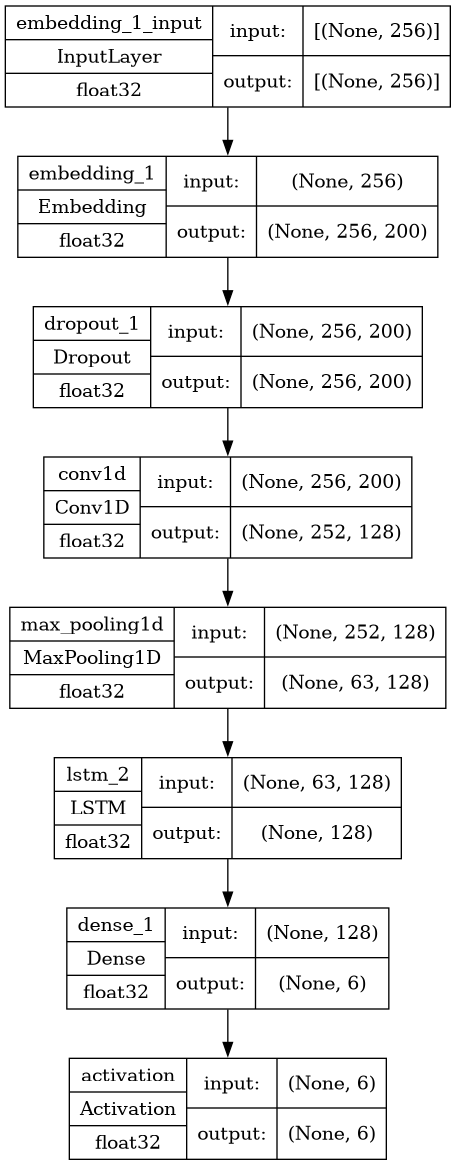

In [60]:
plot_model(model, to_file="tessa_lstm_model.png", show_shapes=True, show_dtype=True)

In [61]:
# Define the optimizer.

adam = Adam(learning_rate=0.0002)

# Define the loss function and metrics.
# Compile the model.

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [62]:
# Fit the model.

history_callback_object = model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping, reduce_learning_rate],
    validation_data=(X_valid, y_valid),
)

Epoch 1/100
63/63 [==============================] - 20s 215ms/step - loss: 1.6129 - accuracy: 0.3351 - val_loss: 1.5668 - val_accuracy: 0.3363 - lr: 2.0000e-04
Epoch 2/100
63/63 [==============================] - 9s 149ms/step - loss: 1.5668 - accuracy: 0.3457 - val_loss: 1.5522 - val_accuracy: 0.3599 - lr: 2.0000e-04
Epoch 3/100
63/63 [==============================] - 6s 88ms/step - loss: 1.5112 - accuracy: 0.4563 - val_loss: 1.4003 - val_accuracy: 0.5604 - lr: 2.0000e-04
Epoch 4/100
63/63 [==============================] - 4s 71ms/step - loss: 1.1198 - accuracy: 0.6133 - val_loss: 0.9075 - val_accuracy: 0.6842 - lr: 2.0000e-04
Epoch 5/100
63/63 [==============================] - 6s 90ms/step - loss: 0.7284 - accuracy: 0.7596 - val_loss: 0.6797 - val_accuracy: 0.7945 - lr: 2.0000e-04
Epoch 6/100
63/63 [==============================] - 3s 53ms/step - loss: 0.5013 - accuracy: 0.8599 - val_loss: 0.5329 - val_accuracy: 0.8386 - lr: 2.0000e-04
Epoch 7/100
63/63 [========================

In [63]:
# Loss graph.

fig = px.line(
    data_frame=history_callback_object.history,
    y=["loss", "val_loss"],
    labels={"index": "Epoch", "value": "Loss"},
    title="Loss vs Epoch",
)
fig.show()

history_callback_object.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [64]:
# Accuracy graph.

fig = px.line(
    data_frame=history_callback_object.history,
    y=["accuracy", "val_accuracy"],
    labels={"index": "Epoch", "value": "Accuracy"},
    title="Accuracy vs Epoch",
)
fig.show()

history_callback_object.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

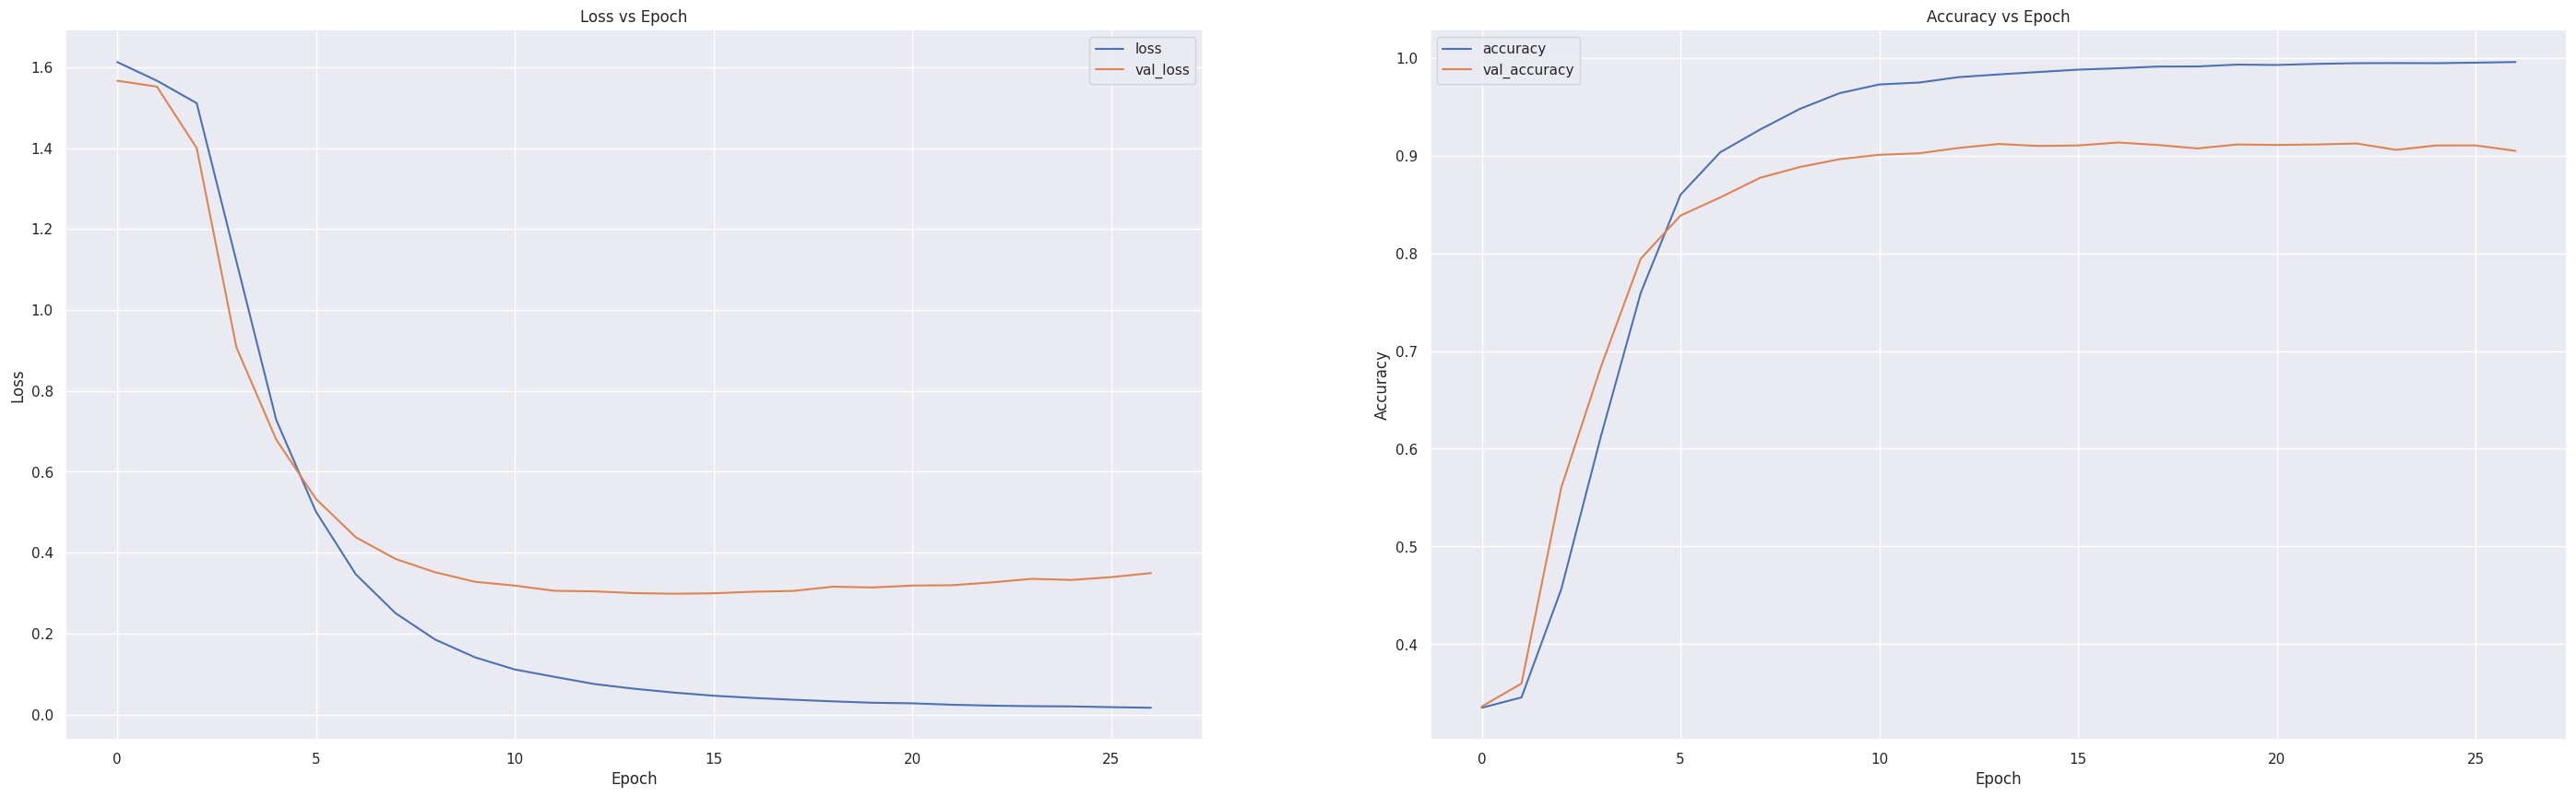

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [65]:
# Both loss and accuracy graphs side to side.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history_callback_object.history["loss"], label="loss")
ax1.plot(history_callback_object.history["val_loss"], label="val_loss")
ax1.legend()
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs Epoch")
ax1.grid(True)

ax2.plot(history_callback_object.history["accuracy"], label="accuracy")
ax2.plot(history_callback_object.history["val_accuracy"], label="val_accuracy")
ax2.legend()
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs Epoch")
ax2.grid(True)

fig.set_figheight(10)
fig.set_figwidth(35)
plt.show()

history_callback_object.history.keys()

---

## #4 Evaluate CNN + LSTM Model


In [66]:
# y_pred stores the probabilities for each emotion. The highest probability corresponds to the predicted emotion.

y_pred = model.predict(X_test)
print(y_pred[0])
y_pred

63/63 [==============================] - 1s 3ms/step
[2.84406383e-07 1.02874066e-04 9.99833107e-01 5.64245602e-05
 3.60895207e-08 7.19988248e-06]


array([[2.84406383e-07, 1.02874066e-04, 9.99833107e-01, 5.64245602e-05,
        3.60895207e-08, 7.19988248e-06],
       [5.20645199e-06, 1.32511917e-03, 9.98349905e-01, 2.06572498e-04,
        1.17618526e-06, 1.11979854e-04],
       [8.34768929e-04, 9.52052233e-06, 1.01761198e-05, 1.08225991e-04,
        9.98569965e-01, 4.67361067e-04],
       ...,
       [1.22304808e-03, 9.23523476e-05, 3.02205852e-04, 4.78424336e-04,
        9.95833874e-01, 2.07011518e-03],
       [4.46764034e-06, 5.88169642e-05, 7.12100863e-02, 9.23483670e-01,
        1.59704156e-04, 5.08323032e-03],
       [1.32164487e-07, 1.56459492e-07, 3.39366161e-05, 9.98905420e-01,
        5.05540338e-05, 1.00981584e-03]], dtype=float32)

In [67]:
#  Predictions on the test data.

y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0])
y_pred

2


array([2, 2, 4, ..., 4, 3, 3])

In [68]:
# Ground truth labels for the testing data.

y_check = np.argmax(y_test, axis=1)
print(y_check[0])
y_check

2


array([2, 2, 4, ..., 4, 3, 3])

In [69]:
print(
    "Accuracy of model on validation data: ",
    model.evaluate(X_valid, y_valid)[1] * 100,
    "%",
    sep="",
)

63/63 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.9133
Accuracy of model on validation data: 91.32832288742065%


In [70]:
print(
    "Accuracy of model on testing data: ",
    model.evaluate(X_test, y_test)[1] * 100,
    "%",
    sep="",
)

63/63 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.9058
Accuracy of model on testing data: 90.57644009590149%


In [71]:
model_loss, model_accuracy = model.evaluate(X_test, y_test)

print("Model Test Loss: %f" % (model_loss))
print("Model Test Loss: %f" % (model_loss * 100), "%\n", sep="")
print("Model Test Accuracy: %f" % (model_accuracy))
print("Model Test Accuracy: %f" % (model_accuracy * 100), "%", sep="")

63/63 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.9058
Model Test Loss: 0.301485
Model Test Loss: 30.148467%

Model Test Accuracy: 0.905764
Model Test Accuracy: 90.576440%


In [72]:
# Calculate our accuracy score.

accuracy = accuracy_score(y_check, y_pred)

# Calculate our precision score.

precision = precision_score(y_check, y_pred, average="micro")

# Calculate our recall score.

recall = recall_score(y_check, y_pred, average="micro")

# Calculate our f1-score.

f1 = f1_score(y_check, y_pred, average="micro")

# Print each of our scores to inspect performance.

print("Accuracy Score: %f" % (accuracy * 100), "%", sep="")
print("Precision Score: %f" % (precision * 100), "%", sep="")
print("Recall Score: %f" % (recall * 100), "%", sep="")
print("F1 Score: %f" % (f1 * 100), "%", sep="")

Accuracy Score: 90.576441%
Precision Score: 90.576441%
Recall Score: 90.576441%
F1 Score: 90.576441%


[[[1685   22]
  [  35  253]]

 [[1749   22]
  [  29  195]]

 [[1281   55]
  [  40  619]]

 [[1775   37]
  [  35  148]]

 [[1382   36]
  [  23  554]]

 [[1915   16]
  [  26   38]]] 



          anger  fear  joy  love  sadness  surprise
anger       253     9    5     2       16         3
fear          9   195    6     0        5         9
joy           3     1  619    29        5         2
love          0     0   30   148        3         2
sadness       8     4    8     3      554         0
surprise      2     8    6     3        7        38 



0=anger, 1=fear, 2=joy, 3=love, 4=sadness, 5=surprise



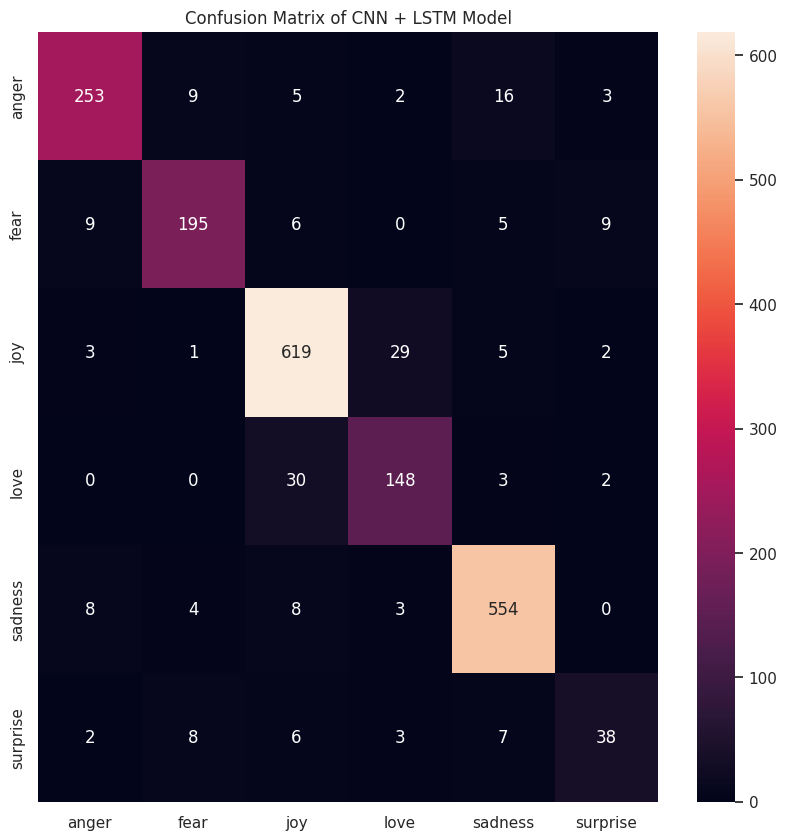

In [73]:
# Confusion Matrix.

emotions_classes_label = ["anger", "fear", "joy", "love", "sadness", "surprise"]

fig = plt.figure(figsize=(10, 10))
plt.title("Confusion Matrix of CNN + LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

cm = multilabel_confusion_matrix(y_check, y_pred)
print(cm, "\n\n\n")

model_matrix = confusion_matrix(y_check, y_pred)
cm = pd.DataFrame(
    model_matrix,
    index=[i for i in emotions_classes_label],
    columns=[i for i in emotions_classes_label],
)


ax = sns.heatmap(cm, annot=True, fmt="d", cbar=True)

print(cm, "\n\n\n")

print("0=anger, 1=fear, 2=joy, 3=love, 4=sadness, 5=surprise\n")

plt.show()

In [74]:
# Classification Report.

y_pred = model.predict(X_test)
y_result = []
y_actual = []

for pred in y_pred:
    y_result.append(np.argmax(pred))

for pred in y_test:
    y_actual.append(np.argmax(pred))

print(
    "Model Classification Report\n",
    classification_report(
        y_actual,
        y_result,
        target_names=["anger", "fear", "joy", "love", "sadness", "surprise"],
    ),
)

63/63 [==============================] - 0s 3ms/step
Model Classification Report
               precision    recall  f1-score   support

       anger       0.92      0.88      0.90       288
        fear       0.90      0.87      0.88       224
         joy       0.92      0.94      0.93       659
        love       0.80      0.81      0.80       183
     sadness       0.94      0.96      0.95       577
    surprise       0.70      0.59      0.64        64

    accuracy                           0.91      1995
   macro avg       0.86      0.84      0.85      1995
weighted avg       0.90      0.91      0.90      1995



In [75]:
tokenizer_file_path = "./tokenizer.pickle"
label_encoder_file_path = "./label_encoder.h5"
cnn_lstm_model_file_path = "./cnn_lstm_model.h5"
cnn_lstm_model_architecture_file_path = "./cnn_lstm_model.json"
cnn_lstm_model_weights_file_path = "./cnn_lstm_model_weights.h5"

#  Save the tokenizer for inference.

with open(tokenizer_file_path, "wb") as f:
    pickle.dump(tokenizer, f)

#  Save the label encoder for inference.

with open(label_encoder_file_path, "wb") as f:
    pickle.dump(label, f)

#  Save the model for inference.

model.save(cnn_lstm_model_file_path)


# Save teh model architecture to JSON.

model_json = model.to_json()
with open(cnn_lstm_model_architecture_file_path, "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5.

model.save_weights(cnn_lstm_model_weights_file_path)

In [76]:
# Inference function for new user input.


def cnn_lstm_inference(user_input):
    # Print the user input.

    print("user_input =", user_input)

    # Create an instance of the Cleaner class.

    cleaner = Cleaner()

    # Call the pipeline function on the new user input.

    cleaned_user_input = cleaner.pipeline(user_input)

    # Print the cleaned user input.

    print("cleaned_user_input =", cleaned_user_input)

    # Convert cleaned_user_input into a sequence of integers.

    cleaned_user_input = tokenizer.texts_to_sequences([cleaned_user_input])

    # Pad the sequences to a length of 256.

    cleaned_user_input = pad_sequences(cleaned_user_input, maxlen=256, truncating="pre")

    # Model predicts the predicted emotion for the cleaned_user_input.

    output = label.inverse_transform(
        np.argmax(model.predict(cleaned_user_input), axis=-1)
    )[0]

    # Calculate the probability of the predicted result.

    probability = np.max(model.predict(cleaned_user_input))

    # Print the predicted emotion with its probability.

    print("Predicted Emotion:", output)
    print("With Probability :", probability)

In [77]:
# New user input inference.

cnn_lstm_inference(
    "It only took one look for me to know we belong together. I'm so happy you're mine, sweetheart."
)

user_input = It only took one look for me to know we belong together. I'm so happy you're mine, sweetheart.
cleaned_user_input = took one look know belong together i m happy mine sweetheart
1/1 [==============================] - 0s 18ms/step
Predicted Emotion: joy
With Probability : 0.99234736
